In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import numbers
from typing import Self, List
np.set_printoptions(precision=2)

%load_ext autoreload
%autoreload 2

from GolfField import GolfField

[[[0 0] - [  0 100]], [[  0 100] - [100 100]], [[100 100] - [100   0]], [[100   0] - [0 0]], [[77.94 19.77] - [79.34 32.97]], [[43.61 94.9 ] - [56.72 91.8 ]], [[ 7.49 60.07] - [17.93 74.95]], [[54.52 52.44] - [68.34 34.06]], [[39.69 62.39] - [50.9  48.93]], [[18.24 91.84] - [35.53 85.72]], [[90.47 40.48] - [64.63 48.02]], [[86.1  59.57] - [71.19 59.6 ]], [[73.26 89.47] - [66.49 80.42]], [[54.01 12.92] - [61.68 37.08]], [[ 4.85 10.98] - [22.93 22.5 ]], [[18.9  47.26] - [34.12 58.19]], [[46.55 76.3 ] - [70.01 94.12]], [[92.   96.87] - [90.5  85.14]], [[82.48 33.58] - [91.22 17.66]]]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[[0 0] - [  0 100]], [[  0 100] - [100 100]], [[100 100] - [100   0]], [[100   0] - [0 0]], [[55.08 70.81] - [32.89 53.97]], [[89.63 12.56] - [70.92 10.55]], [[78.03 30.64] - [49.61 34.79]], [[ 9.22 65.34] - [21.51 57.64]], [[40.65 46.89] - [28.92 31.75]], [[86.05 58.63] - [69.21 49.63]], [[20.54 20.14] - [38.99 13.31]], [[44.51  6.15] - [41.34 20.42]], [[6.7  7.26] - [16.99 13.44]], [[91.4  63.37] - [77.62 61.33]], [[19.21 72.57] - [44.16 82.94]], [[48.51 45.53] - [40.56 37.25]], [[65.22 95.64] - [62.57 84.81]], [[ 8.29 95.97] - [21.23 92.51]], [[26.03 69.2 ] - [35.92 63.73]]]


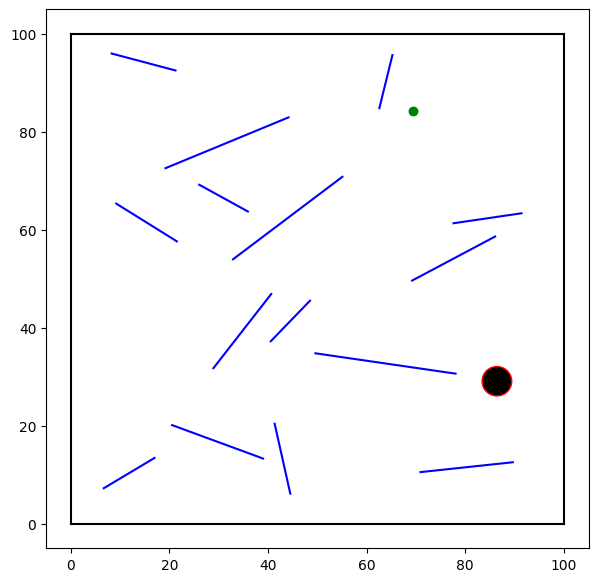

In [21]:
gf = GolfField(3)

gf.reset()
gf.plot()


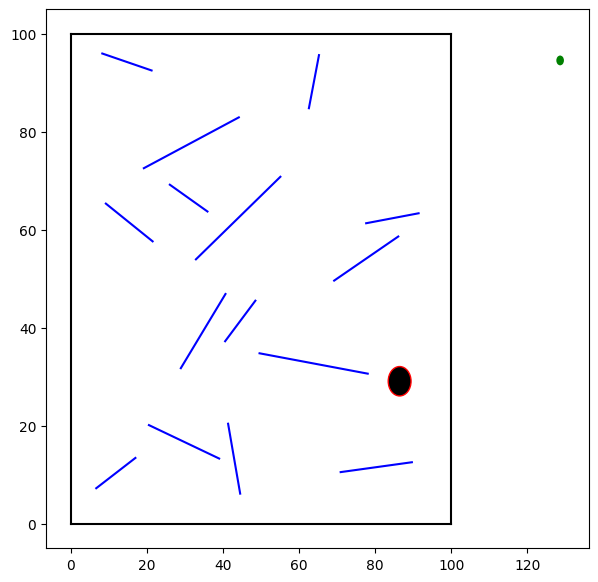

In [28]:
gf.step((10, 10))
gf.plot()


In [3]:
# !pip install python-ffmpeg
# !pip install ffmpeg
# !pip install ImageMagic

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import matplotlib
matplotlib.use('Agg')

def update(frame):
    # print(frame)
    # Clear the previous frame
    plt.clf()
    
    # Plot the ball at the current position
    plt.plot([0], [np.sin(frame)], 'o', color='b')
    
    # Set plot limits
    plt.xlim(-1, 1)
    plt.ylim(-1.5, 1.5)
    
    # Add title
    plt.title('Ball Moving Up and Down')

# Create a figure
fig, ax = plt.subplots()

def update_blit(frame):
    ax.plot([0], [np.sin(frame)], 'o', color='b')
    return ax, 


# Animate the update function
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 100), interval=100, blit=False)
# ani = FuncAnimation(fig, update_blit, frames=np.linspace(0, 2 * np.pi, 100), interval=100, blit=True)

# Display the animation
# plt.show();

# ani.save('animation.gif')
ani.save('animation.gif', writer='imagemagick')
# ani.save('animation.gif', writer='ffmpeg')



In [6]:
from IPython.display import HTML

HTML('<img src="animation.gif">')



![SegmentLocal](animation.gif "segment")


In [207]:
# ![SegmentLocal](191px-Seven_segment_display-animated.gif "segment")
![SegmentLocal](animation.gif "segment")
<img src="FileName.gif" width="750" align="center">


zsh:1: number expected


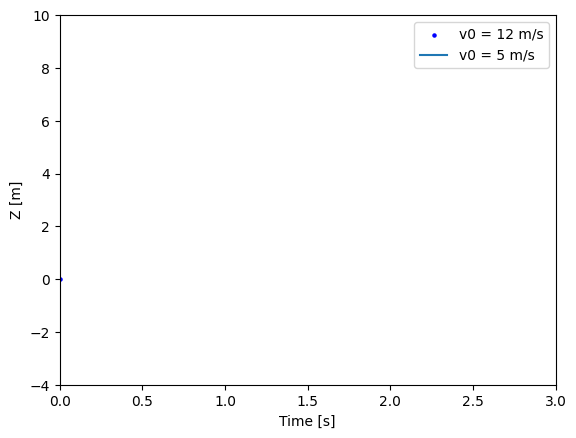

In [204]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()
